In [1]:
import matplotlib.colors as mcolors
import sys
import scanpy as sc
sys.path.append('/homefolder/deborah/Git/Spatial_transcriptomics_rep/src')
from border import tumor_border
from niches import mean_expression_in_grid
from niches import cluster_grid
from niches import niche_composition

/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
adata = sc.read_h5ad('/homefolder/deborah/Rnd/projects/spatial/vizgen/Bioivt_pilot/Samples_annotation/HuOvarianCa-1317546B_annotated.hdf5')

Deriving tumor border

In [3]:
adata = tumor_border(adata,50)

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:19)


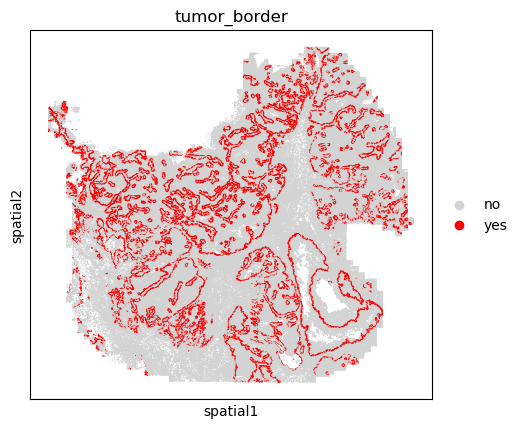

In [4]:

# Define a custom color map: True -> black, False -> light grey
palette = {'yes': 'red', 'no': 'lightgrey'}

# Use the custom color map in the spatial plot
sc.pl.spatial(adata, color='tumor_border', spot_size=30, palette = palette)

Niche areas with mean expression per grid algorithm

In [5]:
avg_expression_dict = mean_expression_in_grid(adata)

/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
adata = cluster_grid(avg_expression_dict, adata, 15)

/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


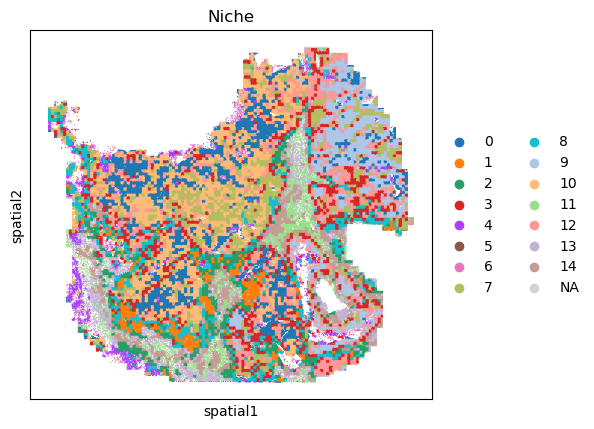

In [7]:
sc.pl.spatial(adata, color='Niche', spot_size=30)

In [8]:
adata_immune = adata[~(adata.obs['minor_cell_type'].str.contains('Epithel'))].copy()

/homefolder/deborah/miniconda3/envs/py2renv/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


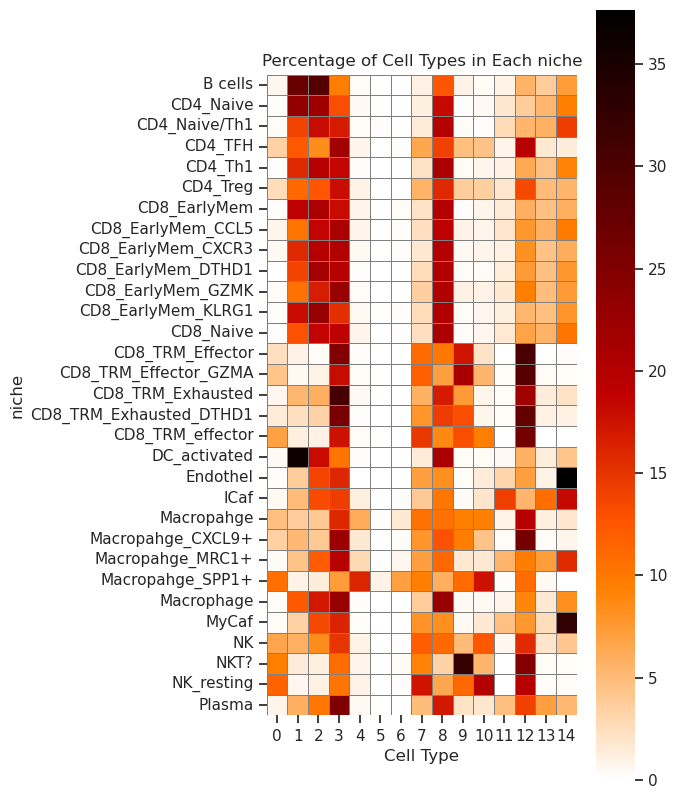

In [9]:
niche_composition(adata_immune)